In [13]:
import sys
import meep as mp
import numpy as np
import os
import matplotlib.pyplot as plt 
import json
sys.path.append('../resonator_abstraction')
from meep_resonator import RingResonator

#### Find the harminvs

#### couplings:

    - 0.6 : under
    - 0.7 : over
    - 0.65 : over
    - 0.625 : over
    - 0.6125 : over
    - 0.60625 :

In [2]:
from scipy.optimize import curve_fit
def sinus(x,a,b,c,d):
    return a*np.sin(2 * np.pi * b*x+c) + d

2025-05-29 12:58:32,159 - INFO - Simulation parameters have been run before and ez field has been loaded!


Simulation Progress: 100%|██████████| 500/500 [00:16<00:00, 29.47it/s]


[ 7.33910359e-02  4.93932597e-02 -3.46825116e+01 -3.03283897e-05]


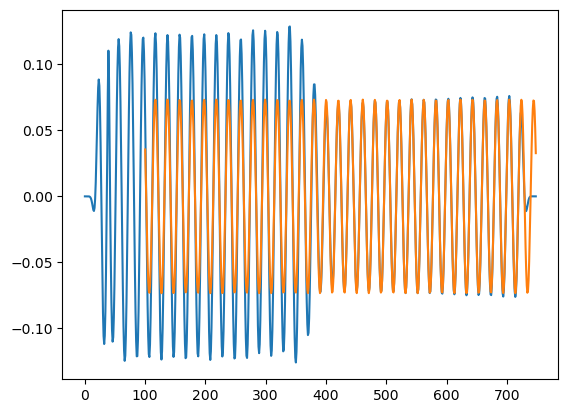

In [ ]:
undercoupling = RingResonator(config_file="solution_refraction_padding_0.7.json")
undercoupling.run_simulation(save_ez=True)
waveguide_center = int(np.round((undercoupling.base_vars["waveguide_xpos"] + undercoupling.base_vars["sy"]/2)*undercoupling.base_vars["resolution"]))
signal = undercoupling.ez_field[waveguide_center]

xdata = np.arange(0, len(signal))
ydata = signal
plt.plot(xdata, signal)
guess = [0.1, 0.04, 0,0]
popt, pcov = curve_fit(sinus, xdata[500:600], ydata[500:600], p0=guess)
print(popt)
fit_x = xdata[100:1400]
plt.plot(fit_x, sinus(fit_x, *popt), label="extrapolation")
plt.show()

2025-05-29 13:01:04,198 - INFO - Simulation parameters have been run before and ez field has been loaded!


Simulation Progress: 100%|██████████| 1000/1000 [00:37<00:00, 26.91it/s]


[-2.60788190e-02  4.93719893e-02 -3.25188146e+01  3.09357451e-05]


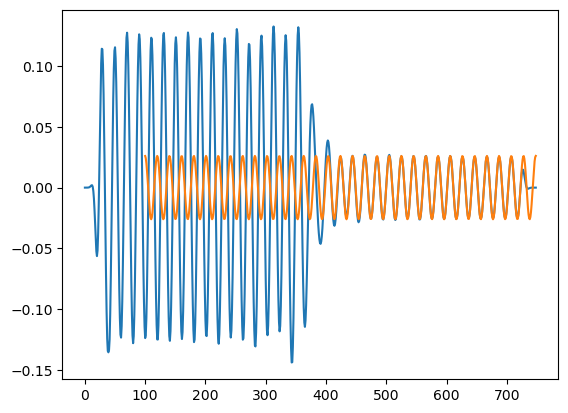

In [100]:
overcoupling = RingResonator(config_file="solution_refraction_padding_0.6.json")
overcoupling.run_simulation(save_ez=True)
waveguide_center = int(np.round((overcoupling.base_vars["waveguide_xpos"] + overcoupling.base_vars["sy"]/2)*overcoupling.base_vars["resolution"]))
signal = overcoupling.ez_field[waveguide_center]

xdata = np.arange(0, len(signal))
ydata = signal
plt.plot(xdata, signal)
guess = [0.1, 0.04, 0,0]
popt, pcov = curve_fit(sinus, xdata[500:600], ydata[500:600], p0=guess)
print(popt)
fit_x = xdata[100:1400]
plt.plot(fit_x, sinus(fit_x, *popt), label="extrapolation")
plt.show()

Simulation Progress:   0%|          | 0/500 [00:00<?, ?it/s]Warning: grid volume is not an integer number of pixels; cell size will be rounded to nearest pixel.


Simulation Progress: 533it [00:19, 27.27it/s]                         
2025-05-29 13:35:03,256 - INFO - Resonances detected: [Mode(freq=0.37541484279952164, decay=-0.002229830001923924, Q=84.18014881753524, amp=(-0.0011611971603732688+0.0034918782447559507j), err=(4.864398089664784e-05+0j)), Mode(freq=0.41014338470671, decay=-0.0015585070772262796, Q=131.58213738645773, amp=(-0.007951856760236976-0.009999741879894088j), err=(6.897519967145621e-07+0j)), Mode(freq=0.44483301246712564, decay=-0.0009175494938217075, Q=242.40273438239333, amp=(0.025320432852404564+0.011409134396380777j), err=(3.462307991214941e-07+0j)), Mode(freq=0.4790159547988727, decay=-0.0005347110346157094, Q=447.9203941836883, amp=(-0.032645612586715264-0.000556206374079374j), err=(2.619012398119065e-07+0j)), Mode(freq=0.5127648962771483, decay=-0.0003107984765144088, Q=824.9153953838255, amp=(0.02155297202237308-0.008192458141779286j), err=(3.0245195008497296e-07+0j)), Mode(freq=0.5462333222197439, decay=-0.000203001

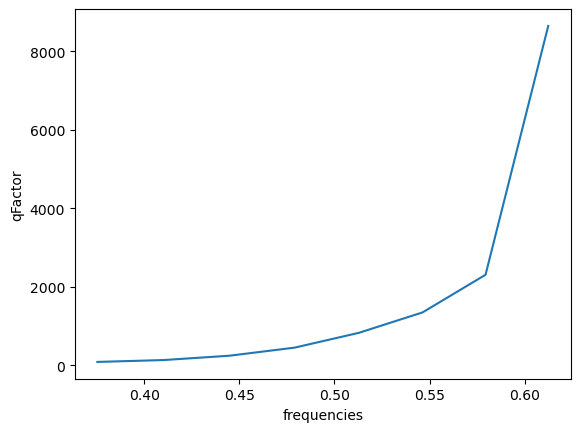

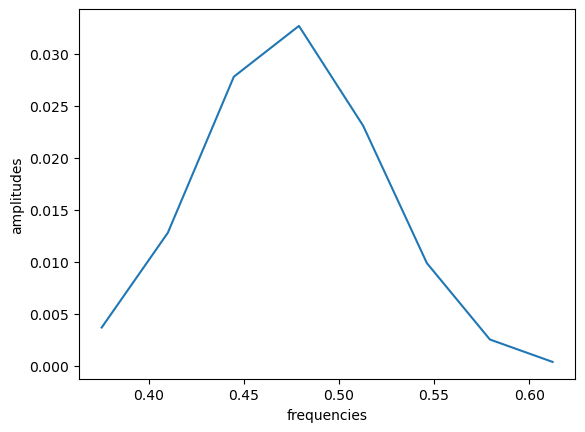

Configuration updated successfully. New wavelength: 2.087613136852354


In [117]:
overcoupling = RingResonator(config_file="refraction_padding_0.6.json")
overcoupling.find_resonances("test")

### Critical coupling between distances 0.6um and 0.7um
    min_wavelength = 2.05
    max_wavelength = 2.15

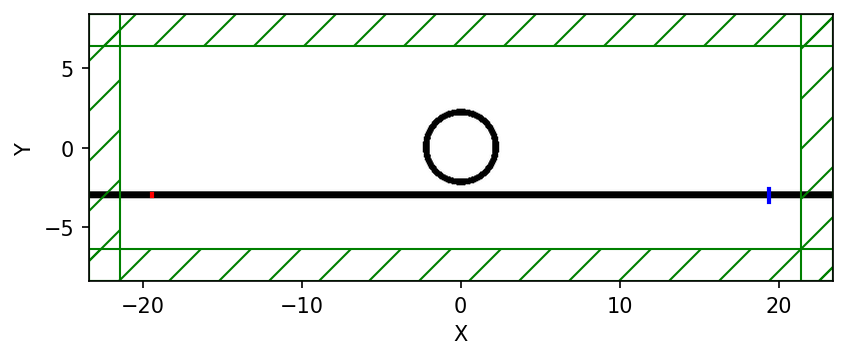

Simulation Progress:   0%|          | 0/1000 [00:00<?, ?it/s]Warning: grid volume is not an integer number of pixels; cell size will be rounded to nearest pixel.


Simulation Progress: 1010it [00:37, 26.69it/s]                         
2025-05-30 11:29:43,751 - INFO - Resonances detected: [Mode(freq=0.37510728266191956, decay=-0.0020159103676819228, Q=93.03669663975488, amp=(0.0014622111942022172-2.2830880391079598e-05j), err=(4.767702390076875e-06+0j)), Mode(freq=0.41012810341341727, decay=-0.001589843745418544, Q=128.98377736657588, amp=(-0.0017349101350073964+0.0005157264722588796j), err=(3.958871827582214e-06+0j)), Mode(freq=0.44483480311477, decay=-0.0009261545652590451, Q=240.15149295860238, amp=(0.0014249846102054142-0.0005854299201253472j), err=(9.868816649994684e-07+0j)), Mode(freq=0.4790180574479204, decay=-0.0005311481882449115, Q=450.9269428469236, amp=(-0.0010922502780604734+0.0006493596959438419j), err=(2.7825537188162804e-07+0j)), Mode(freq=0.5127633614880789, decay=-0.0003104723884980058, Q=825.7793293128423, amp=(0.000854904920606281-0.0006881395371649787j), err=(1.0814548863012743e-07+0j)), Mode(freq=0.5462331887883253, decay=-0

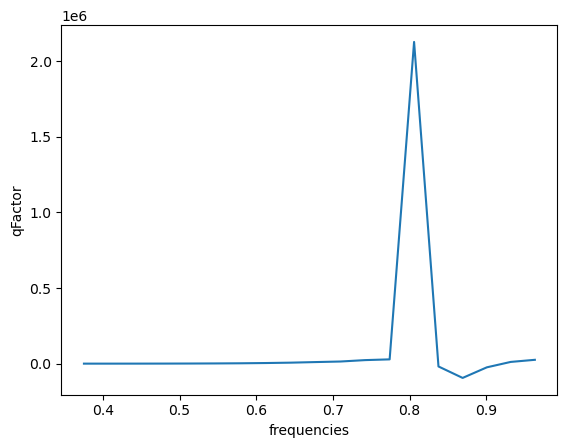

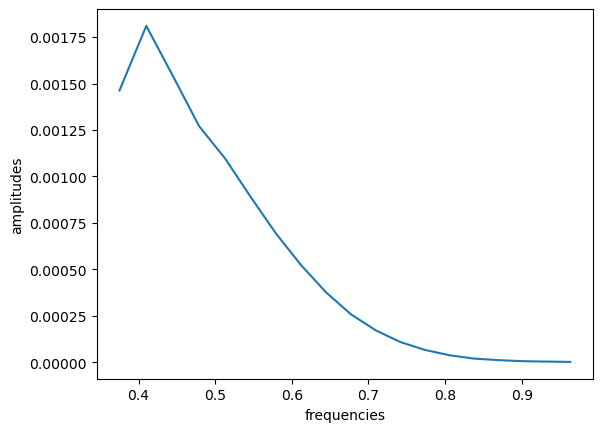

Configuration updated successfully. New wavelength: 2.438262561568428


In [ ]:

scan = RingResonator(config_file="transmission/scan_padding_0.6.json")
scan.view_sim_region()
#scan.find_resonances("transmission/test")

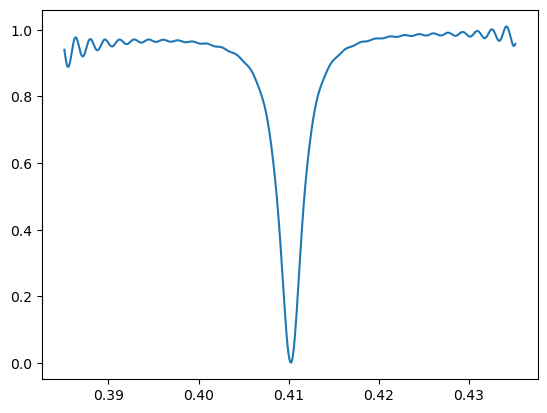

fcen: 0.41012810341341727 0.41012810341341727
flux monitor center: Vector3<20.9, -3.0, 0.0> Vector3<20.9, -3.0, 0.0>
flux monitor size: Vector3<0.0, 0.8, 0.0> Vector3<0.0, 0.8, 0.0>


In [136]:
# First simulation (normalization)
scan_ref = RingResonator("transmission/scan_padding_0.6_normalize.json")
pt = mp.Vector3(scan_ref.base_vars["sx"]/2 - scan_ref.base_vars["dpml"] - 0.5, scan_ref.base_vars["waveguide_ypos"])
scan_ref.sim.run(until_after_sources=mp.stop_when_fields_decayed(200, mp.Ez, pt, 1e-3))
incident_flux = mp.get_fluxes(scan_ref.fluxes[0])


# Second simulation (with ring)
scan_ring = RingResonator("transmission/scan_padding_0.6.json")
scan_ring.sim.run(until_after_sources=mp.stop_when_fields_decayed(200, mp.Ez, pt, 1e-3))
ring_flux = np.array(mp.get_fluxes(scan_ring.fluxes[0]))


# Normalize
flux_freqs = mp.get_flux_freqs(scan_ring.fluxes[0])
normalized_flux = ring_flux / np.array(incident_flux)
plt.plot(flux_freqs, normalized_flux)
plt.show()
print("fcen:", scan_ref.base_vars["fcen"], scan_ring.base_vars["fcen"])
print("flux monitor center:", scan_ref.fluxes[0].regions[0].center, scan_ring.fluxes[0].regions[0].center)
print("flux monitor size:", scan_ref.fluxes[0].regions[0].size, scan_ring.fluxes[0].regions[0].size)

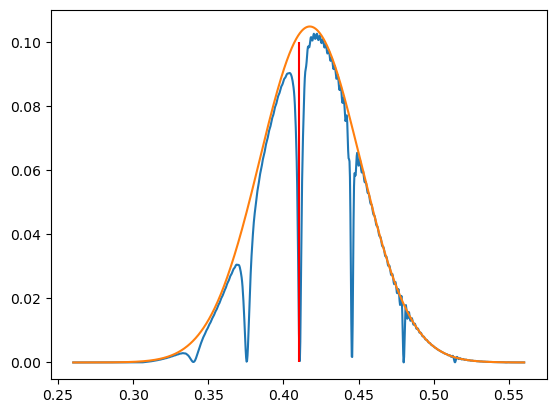

In [134]:
plt.plot(flux_freqs,ring_flux)
plt.plot(flux_freqs,  np.array(incident_flux))
plt.vlines(0.41012810341341727, 0,0.1, color="red")

In [131]:
(0.43-0.39)*3*10e9

1199999999.9999993